# Association Rule Mining
## Introduction

The retail industry is vast, with millions of transactions occurring daily. Each transaction or invoice can contain multiple items, bought together by a customer. This kind of data is rich for analysis, particularly for mining association rules. Association rules can uncover patterns like: *if a customer buys product A, they are also likely to buy product B*. Such insights can greatly benefit the business in strategic decision-making, offering promotions, or managing inventory.

In this project, I will delve into the "Online Retail" dataset from the UCI Machine Learning Repository. The dataset captures sales data from a UK-based online retail store and includes variables like Invoice Number, Stock Code, Product Description, Quantity, Invoice Date, Unit Price, Customer ID, and Country. The key aspect I'll focus on is the transactions – specifically, which products tend to be bought together. This will be done using association rule mining techniques.

## Step 1: Loading and Preliminary Exploration of the Data
Let's start by loading the data and having an initial look at it.

Since the data is in XLSX format, we can use pandas to load it into a DataFrame.

In [1]:
import pandas as pd
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
retail_data = pd.read_excel('Online Retail.xlsx', engine='openpyxl')
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Now that the data is loaded, we can explore its structure, check for any missing values, and get a general sense of the dataset:

In [3]:
print("Number of rows:", retail_data.shape[0])
print("Number of columns:", retail_data.shape[1])
print("\n")

missing_values = retail_data.isnull().sum()
print("Missing values for each column:")
print(missing_values)
print("\n")

print("Descriptive statistics:")
retail_data.describe()

Number of rows: 541909
Number of columns: 8


Missing values for each column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


Descriptive statistics:


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Based on the preliminary exploration, we see that:

- The dataset has 541,909 rows and 8 columns.
- There are missing values in the 'Description' and 'CustomerID' columns.
- The 'Quantity' column has both negative and very high values. Negative quantities might represent returned items.
- The 'UnitPrice' column also has negative values, which needs further investigation.

Our next steps, therefore, will include:

- Handling missing values.
- Investigating negative quantities and unit prices.
- Preparing data for association rule mining.

## Step 2: Data Preprocessing
### 2.1 Handling Missing Values
For association rule mining, the most crucial columns are 'InvoiceNo', 'StockCode', and 'Description'. Since 'CustomerID' is not necessary for this analysis, we can ignore its missing values. However, the missing 'Description' values should be addressed.

Given that we're interested in items and their descriptions, rows with missing descriptions can be dropped.

In [4]:
retail_data = retail_data.dropna(subset=['Description'])

### 2.2 Investigating Negative Quantities and Unit Prices
Negative values in 'Quantity' likely represent returned items. For the purpose of this analysis, we can filter out these transactions as they won't help in understanding purchasing patterns.

Similarly, negative 'UnitPrice' doesn't make logical sense for our analysis, so it's a good idea to filter these out as well.

In [5]:
retail_data = retail_data[retail_data['Quantity'] > 0]
retail_data = retail_data[retail_data['UnitPrice'] > 0]

### 2.3 Preparing Data for Association Rule Mining
For association rule mining, the data format generally preferred is a list of transactions, where each transaction is a list of items bought together. Let's transform our data into this format.

In [6]:
transactions = retail_data.groupby('InvoiceNo')['Description'].apply(list)
print(transactions.head())

InvoiceNo
536365    [WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...
536366    [HAND WARMER UNION JACK, HAND WARMER RED POLKA...
536367    [ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO...
536368    [JAM MAKING SET WITH JARS, RED COAT RACK PARIS...
536369                           [BATH BUILDING BLOCK WORD]
Name: Description, dtype: object


Now, the `transactions` object contains lists of items for each invoice, which is ready to be fed into an association rule mining algorithm.

Now that the data is preprocessed and in the desired format, we can proceed to association rule mining.

## Step 3: Association Rule Mining
Association rule mining is primarily about discovering interesting relationships between variables in large datasets. One popular algorithm for this purpose is the Apriori algorithm. For this task, we'll use the mlxtend library, which provides a straightforward implementation of the Apriori algorithm and association rules.



### 3.1 Encoding the Data
The Apriori function from `mlxtend` requires data to be in a one-hot encoded DataFrame format. We'll use `TransactionEncoder` from `mlxtend` to transform our list of transactions.

In [7]:
encoder = TransactionEncoder()
onehot = encoder.fit_transform(transactions)
onehot_df = pd.DataFrame(onehot, columns=encoder.columns_)

We can look into more detail of this transformation:

In [8]:
print("Shape:")
print(onehot_df.shape)
print("\n")

print("Top 10 items by frequency:")
product_frequencies = onehot_df.sum().sort_values(ascending=False)
print(product_frequencies.head(10))
print("\n")

print("Descriptive statistics:")
transaction_counts = onehot_df.sum(axis=1)
print(transaction_counts.describe())


Shape:
(19960, 4026)


Top 10 items by frequency:
WHITE HANGING HEART T-LIGHT HOLDER    2256
JUMBO BAG RED RETROSPOT               2089
REGENCY CAKESTAND 3 TIER              1988
PARTY BUNTING                         1685
LUNCH BAG RED RETROSPOT               1564
ASSORTED COLOUR BIRD ORNAMENT         1455
SET OF 3 CAKE TINS PANTRY DESIGN      1385
PACK OF 72 RETROSPOT CAKE CASES       1320
LUNCH BAG  BLACK SKULL.               1273
NATURAL SLATE HEART CHALKBOARD        1249
dtype: int64


Descriptive statistics:


count    19960.000000
mean        26.022946
std         46.950615
min          1.000000
25%          6.000000
50%         15.000000
75%         29.000000
max       1108.000000
dtype: float64


**Shape:**
- There are 19,960 transactions.
- There are 4,026 unique products/items.

**Top 10 items by frequency:**
- The top item "WHITE HANGING HEART T-LIGHT HOLDER" appeared in 2,256 transactions.
- The least frequent of the top 10 items "NATURAL SLATE HEART CHALKBOARD" appeared in 1,249 transactions.

**Products per transaction statistics:**
- On average, each transaction contains 26 items.
- The largest transaction contains 1,108 items.
- Half of the transactions contain 15 items or fewer.

The next step is to actually apply the apriori algorithm to find frequent itemsets. Once we have frequent itemsets, we can find association rules.

### 3.2 Finding Frequent Itemsets
Before generating association rules, we need to identify frequent itemsets in the dataset. 
The `min_support` parameter is a threshold for how frequently an itemset has to occur to be considered "frequent" - we will set it to 2.5% and filter out the weak item pairs later when generating the rules:

In [9]:
frequent_itemsets = apriori(onehot_df, min_support = 0.025, use_colnames=True)
frequent_itemsets.tail()

,support,itemsets
219,0.029960,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC..."
220,0.025301,"(WOODLAND CHARLOTTE BAG, RED RETROSPOT CHARLOT..."
221,0.026303,"(REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACU..."
222,0.027004,"(WOODEN FRAME ANTIQUE WHITE , WOODEN PICTURE F..."
223,0.027104,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC..."


### 3.3 Generating Association Rules
With the frequent itemsets identified, we can generate association rules. 
We will use the 'lift' metric - a measure used in association rule mining that tells us how much more likely item A is bought when item B is bought, compared to if we just bought item A alone. It is defined as the ratio of the observed support to that expected if the two items were independent.

We set a threshold of one to indicate that we're interested in rules where items are at least independent (not negatively associated):
- Lift = 1: A and B are independent and there's no association between them.
- Lift > 1: A and B are positively associated, meaning the likelihood of item B being bought increases when item A is bought.
- Lift < 1: A and B are negatively associated, meaning the likelihood of item B being bought decreases when item A is bought.

In [10]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.049098,0.052655,0.032064,0.653061,12.402571,0.029479,2.730582,0.966842
1,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.052655,0.049098,0.032064,0.608944,12.402571,0.029479,2.431625,0.970472
2,(CHARLOTTE BAG PINK POLKADOT),(RED RETROSPOT CHARLOTTE BAG),0.037174,0.051703,0.026152,0.703504,13.606532,0.024230,3.198346,0.962278
3,(RED RETROSPOT CHARLOTTE BAG),(CHARLOTTE BAG PINK POLKADOT),0.051703,0.037174,0.026152,0.505814,13.606532,0.024230,1.948306,0.977021
4,(CHARLOTTE BAG SUKI DESIGN),(RED RETROSPOT CHARLOTTE BAG),0.044188,0.051703,0.025401,0.574830,11.117835,0.023116,2.230394,0.952127


### 3.4 Inspecting the Rules
Finally, let's take a look at the top rules sorted by the lift metric:

In [11]:
rules_sorted = rules.sort_values(by="lift", ascending=False)
rules_sorted.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
71,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",(PINK REGENCY TEACUP AND SAUCER),0.038427,0.038327,0.027104,0.705346,18.403524,0.025631,3.263732,0.983454
74,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",0.038327,0.038427,0.027104,0.707190,18.403524,0.025631,3.283944,0.983351
75,(GREEN REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.050752,0.029960,0.027104,0.534057,17.825724,0.025584,2.081887,0.994367
70,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.029960,0.050752,0.027104,0.904682,17.825724,0.025584,9.958782,0.973054
10,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.038327,0.050752,0.031663,0.826144,16.278213,0.029718,5.459963,0.975974
11,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.050752,0.038327,0.031663,0.623889,16.278213,0.029718,2.556890,0.988749
73,(ROSES REGENCY TEACUP AND SAUCER ),"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",0.053357,0.031663,0.027104,0.507981,16.043204,0.025415,1.968089,0.990519
72,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.031663,0.053357,0.027104,0.856013,16.043204,0.025415,6.574490,0.968329
9,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.037976,0.045741,0.027355,0.720317,15.747557,0.025618,3.411924,0.973466
8,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.045741,0.037976,0.027355,0.598028,15.747557,0.025618,2.393264,0.981388


Analyzing the top 10 association rules, several patterns and insights emerge:

**Color Patterns:**

- The combination of PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY TEACUP AND SAUCER, and ROSES REGENCY TEACUP AND SAUCER stands out prominently. These items frequently appear together, suggesting they might be part of a collection or set.
- It's evident that if someone buys a PINK REGENCY TEACUP AND SAUCER, there's a strong likelihood they'll also purchase the GREEN REGENCY TEACUP AND SAUCER and vice versa. The lift value for these combinations is well above 16, indicating a robust association.
- We can therefore see that *similar items of different colors* are often bought together, forming a set or a collection.

**Style Patterns:**

- We observe a strong association between the items GARDENERS KNEELING PAD CUP OF TEA and GARDENERS KNEELING PAD KEEP CALM. The substantial lift value of approximately 15.75 suggests that these two items are frequently bought together.
-This could indicate that customers who are interested in *one design* of the kneeling pad often *find the other design appealing* as well, similar to the cup colors.

**Confidence Levels:**

- Confidence levels for many of these rules are significantly high, often above 0.7. This high confidence suggests that the likelihood of the consequent product being bought, given the antecedent has been purchased, is strong. For instance, *a confidence level of 0.7 means there's a 70% chance that the consequent item will be purchased if the antecedent is in the basket.*

**Zhang's Metric:**

- Zhang's metric provides a balanced measure of the rule's importance, taking into account both support and confidence. All the top rules have a Zhang's metric *close to 1*, suggesting these are strong and significant rules.

Implications for Retail: Given such associations between certain product pairs or sets, retailers could introduce bundle discounts, co-advertise such products, or position them close to each other in the store.

## Step 4: Visualizing Association Rules

To better understand the association rules generated from our dataset, we will visualize them using a network graph. This will help in showcasing which items (or sets of items) are commonly associated with one another.

**Methodology**
- **Node Representation:** Every unique item in both the antecedents and consequents is represented as a node in the network graph.
- **Edge Representation:** A directed edge from one node to another signifies an association rule where the source node is an antecedent and the target node is a consequent. The width of the edge corresponds to the lift of that rule.
- **Node Coloring:** Nodes are color-coded based on the connected component they belong to. This helps in distinguishing groups of items that are closely associated with each other.
- **Node Size:** The size of a node corresponds to its degree - nodes with more connections (or associations) are represented larger.
- **Labels:** For clarity, we can label the nodes using unique IDs instead of the item names. A legend provides the mapping from these IDs to the actual item names.

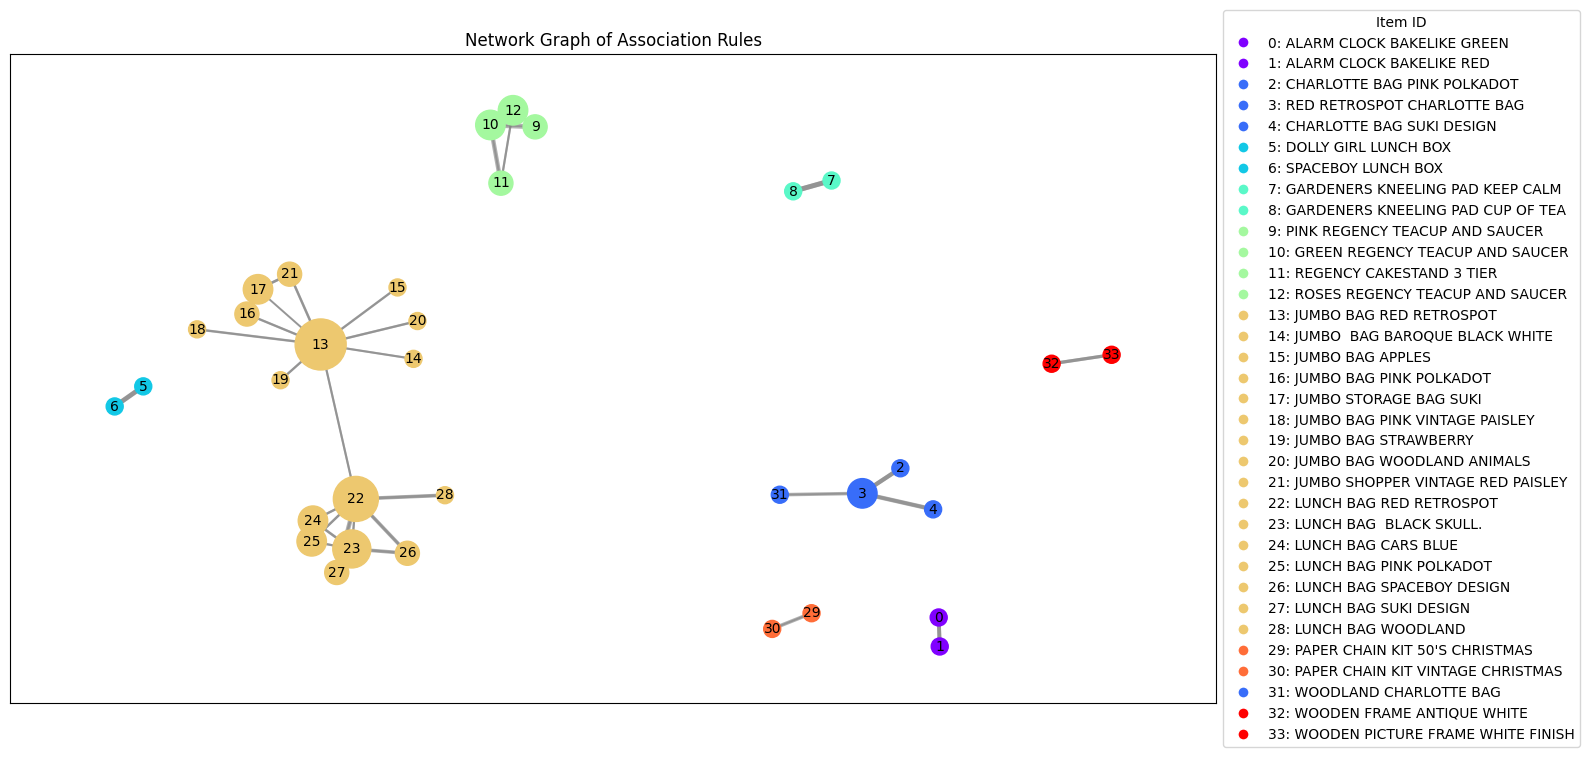

In [12]:
def normalize(values, width_range=(1, 4)):
    min_val, max_val = min(values), max(values)
    min_width, max_width = width_range
    return [min_width + (max_width - min_width) * (value - min_val) / (max_val - min_val) for value in values]

edge_widths = [row['lift'] for _, row in rules.iterrows()]
normalized_edge_widths = normalize(edge_widths)


graph = nx.DiGraph()
item_to_id = {}
id_to_item = {}

current_id = 0
for _, row in rules.iterrows():
    for item in row['antecedents']:
        if item not in item_to_id:
            item_to_id[item] = current_id
            id_to_item[current_id] = item
            current_id += 1
    for item in row['consequents']:
        if item not in item_to_id:
            item_to_id[item] = current_id
            id_to_item[current_id] = item
            current_id += 1

edge_widths = []
for _, row in rules.iterrows():
    graph.add_edge(item_to_id[tuple(row['antecedents'])[0]], item_to_id[tuple(row['consequents'])[0]], weight=row['lift'])
    edge_widths.append(row['lift'])

colors = plt.cm.rainbow(np.linspace(0, 1, len(list(nx.weakly_connected_components(graph)))))
color_map = {}
for idx, component in enumerate(nx.weakly_connected_components(graph)):
    for node in component:
        color_map[node] = colors[idx]

node_sizes = [len(list(graph.neighbors(n))) * 150 for n in graph.nodes()]

fig, ax = plt.subplots(figsize=(16, 8))
pos = nx.spring_layout(graph, k=0.6)
nx.draw_networkx_nodes(graph, pos, ax=ax, node_size=node_sizes, node_color=[color_map[node] for node in graph.nodes()])
nx.draw_networkx_labels(graph, pos, ax=ax, labels={node:node for node in graph.nodes()}, font_size=10)
nx.draw_networkx_edges(graph, pos, ax=ax, edge_color='gray', width=normalized_edge_widths, alpha=0.6, arrows=False)

ax.set_title('Network Graph of Association Rules')

handles = [plt.Line2D([0], [0], marker='o', color='w', label=f"{id}: {item}", markersize=8, markerfacecolor=color_map[id]) for id, item in id_to_item.items()]
ax.legend(handles=handles, loc="center left", bbox_to_anchor=(1, 0.5), title="Item ID")

plt.tight_layout()
plt.show()


**Network Graph Analysis:**
We can see that association rules seem to be strong for the items of the same/similar category:
- **<span style="color: yellow">Storage bags</span>** - two large groups of **Jumbo bags** of different color patterns (strawberry, apples, red), styles (retrosport, baroque), purposes (storage, shopper, unspeciied), and **lunch bags** - also of different styles and designs. This might indicate that customers often purchase several storage bags at once (perhaps, the jumbo bags for moving purposes), or buy several lunch boxes for their family. Based on the size of the nodes we can also note that the 'Retrosport' jumbo and lunch bags are most frequently bought together with other storage bags;
- **<span style="color: purple">Alarm clock</span>** - different colors;
- **<span style="color: darkblue">Charlotte bags</span>** - different design/color;
- **<span style="color: lightblue">Lunch boxes</span>** - a pair of lunch boxes for kids (boy/girl design);
- **<span style="color: teal">Gardening kneeling pads</span>** - different mottos;
- **<span style="color: lightgreen">Serveware</span>** - teacup, saucer and cakestand, differing in colors;
- **<span style="color: orange">Christmas paper chains</span>** - different styles;
- **<span style="color: red">Wooden frames</span>**.


## Conclusion
Throughout our analysis, we employed association rule mining to discover underlying patterns within the transaction dataset. By identifying combinations of items frequently bought together, we gained valuable insights into the purchase behavior of customers. The subsequent visualization using a network graph further elucidated the inter-relationships between these items, highlighting not only the groups of commonly co-purchased items but also the strength of their associations based on metrics like lift. Such findings hold immense value for retailers: they suggest potential strategies for product bundling, in-store placement, promotions, and more. Going forward, leveraging these insights could lead to more effective marketing campaigns, improved sales, and enhanced customer satisfaction.